![cg.jpg](https://raw.githubusercontent.com/jdanifalcon/FundamentosIA/main/logo/logo_cg.jpg)


# Tarea 1

#### Aprendizaje de máquina
#### @date 14/05/2023
#### @autor: Jessica Daniela Ocaña Falcón

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def crear_transformacion_matrices(theta, s1, s2, h):
    """
    Crea las matrices de rotación, escalado y cizalladura.

    Parámetros:
    theta - Ángulo de rotación en radianes.
    s1, s2 - Factores de escalado en x e y respectivamente.
    h - Factor de cizalladura.

    Retorna:
    R, S, H - Matrices de rotación, escalado y cizalladura.
    """
    # Matriz de rotación
    R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    # Matriz de escalado
    S = np.array([
        [s1, 0],
        [0, s2]
    ])
    # Matriz de cizalladura
    H = np.array([
        [1, h],
        [0, 1]
    ])
    return R, S, H

In [30]:
def apply_transform_afin(square, A, b):
    """
    Aplica la transformación afín a un conjunto de puntos.

    Parámetros:
    cuadrado - Puntos del cuadrado original (2xN numpy array).
    A - Matriz de transformación afín.
    b - Vector de traslación.

    Retorna:
    cuadrado_transformado - Puntos transformados.
    """
    cuadrado_transformado = A @ square + b[:, np.newaxis]
    return cuadrado_transformado

In [31]:
def plot_transform(original, transformed):
    """
    Grafica el cuadrado original y el transformado.

    Parámetros:
    original - Puntos del cuadrado original.
    transformado - Puntos del cuadrado transformado.
    """
    plt.figure(figsize=(8, 8))
    plt.plot(original[0, :], original[1, :], 'm-', label='Original')
    plt.plot(transformed[0, :], transformed[1, :], 'g-', label='Transformado')
    plt.xlim(-2, 4)
    plt.ylim(-2, 4)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Transformación Afín de un Cuadrado')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

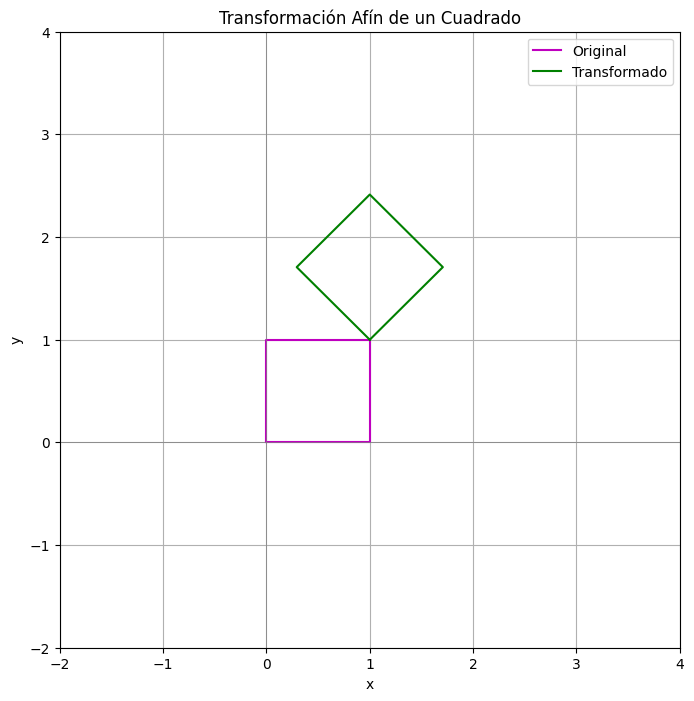

In [32]:
def transform_afin(theta=np.pi/4, s1=1, s2=1, h=0, tx=0, ty=0):
    """
    Realiza y grafica una transformación afín en un cuadrado.

    Parámetros:
    theta - Ángulo de rotación en radianes (default: π/4).
    s1 - Factor de escalado en x (default: 1).
    s2 - Factor de escalado en y (default: 1).
    h - Factor de cizalladura (default: 0).
    tx - Traslación en x (default: 0).
    ty - Traslación en y (default: 0).
    """
    # Crear las matrices de transformación
    R, S, H = crear_transformacion_matrices(theta, s1, s2, h)
    # Componer la transformación afín
    A = R @ S @ H
    b = np.array([tx, ty])

    # Puntos originales del cuadrado
    cuadrado = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0]  # para cerrar el cuadrado
    ]).T

    # Aplicar la transformación afín
    cuadrado_transformado = apply_transform_afin(cuadrado, A, b)

    # Graficar
    plot_transform(cuadrado, cuadrado_transformado)

# Parametros: angulo en radianes, factores de escalado, factor de cizalla, traslacion en x e y
transform_afin(np.pi/4, 1, 1, 0, 1, 1)